# DETECTING ALZHEIMER'S DISEASE 

## GROUP 6: 
1. Radhika Garg 401/2020
2. Maji Geethika Sai
3. Himanshu Tandon
4. Himangi Chauhan
5. Somya Jain

## Load the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the CSV File 
df = pd.read_csv('oasis_longitudinal.csv')
print("DIMENSIONS OF DATASET")
print(df.shape)
print("\nDATASET HEAD")
df.head()

DIMENSIONS OF DATASET
(370, 12)

DATASET HEAD


,Subject ID,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Lets understand the dataset now!

**Dataset Description:** 
1. Longitudinal MRI data from OASIS database.
2. The dataset consists of 150 subjects aged 60 to 96.
3. Subject were scanned over multiple visits.
4. Everyone is right-handed.
5. 72 people were labeled as 'Nondemented' throughout the study and 64 of the subjects were grouped as 'Demented' and they remained in same group.   
6. 14 subjects were labeled as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. They are called subjects of 'Converted' category.

| COL  | Description                         |
|------|-------------------------------------|
| EDUC | Years of Education                  |
| SES  | Socioeconomic Status                |
| MMSE | Mini Mental State Examination       |
| CDR  | Clinical Dementia Rating            |
| eTIV | Estimated Total Intracranial Volume |
| nWBV | Normalize Whole Brain Volume        |
| ASF  | Atlas Scaling Factor                |


**Clinical Info:**
1. MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best).The Mini–Mental State Examination (MMSE) or Folstein test is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment

|   **Method**  |**Score**|  **Interpretation**                   |                   
|---------------|---------|--------------------------------------|
| Single Cutoff |   <24   |        Abnormal                      |
|     Range     |   <21   |  Increased Odds of Dementia          |
|               |   <25   |  Decreased Odds of Dementia          |
|   Education   |    21   |  Abnormal for 8th Grade Education    |
|               |   <23   |  Abnormal for High School Education  |
|               |   <24   |  Abnormal for College Education      |
|   Severity    |  24-30  |  No Cognitive Impairment             |
|               |  18-23  |  Mild Cognitive Impairment           |
|               |   0-17  |  Severe Cognitive Impairment         |

2. CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD).The CDR is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care.

| Score  | Description               |
|--------|---------------------------|
|    0   |        Normal             |
|    0.5 | Very Mild Dementia        | 
|    1   | Mild Dementia             |
|    2   | Moderate Dementia         |
|    3   | Severe Dementia           |

3. Derived anatomic volumes
4. eTIV - Estimated total intracranial volume, mm3
Total intracranial volume (TIV/ICV) is an important covariate for volumetric analyses of the brain and brain regions, especially in the study of neurodegenerative diseases, where it can provide a proxy of maximum pre-morbid brain volume.
Unlike brain atrophy in the patients with AD, TIV did not vary over time. Mean TIV did not differ significantly between any of the subject groups. There was no association between TIV and age or age at symptom onset. The only significant predictor of TIV was sex. Men showed an approximately ∼12% larger eTIV than women.
5. nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
6. ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

## Data Cleaning

In [3]:
print("COUNTING NULL VALUES")
print(df.isna().sum())
print("\n")
print("COUNTING DUPLICATED VALUES")
print(sum(df.duplicated()))

COUNTING NULL VALUES
Subject ID     0
Group          0
Visit          0
Gender         0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


COUNTING DUPLICATED VALUES
0


In [4]:
df[df.isnull().any(axis=1)]

,Subject ID,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,Demented,1,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,Demented,3,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,Demented,4,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,Demented,1,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,Demented,2,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
206,OAS2_0099,Demented,1,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
207,OAS2_0099,Demented,2,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


Some EDUC and SES values are missing only for the Demented Group. Impute the values using mean of column, grouped on
class Demented

In [5]:
df['SES']=df.groupby(['Group','Gender'])['SES'].transform(lambda val: val.fillna(val.mean()))
df['MMSE']=df.groupby(['Group','Gender'])['MMSE'].transform(lambda val: val.fillna(val.mean()))
df.isnull().sum()

Subject ID    0
Group         0
Visit         0
Gender        0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
df=df.drop(['Subject ID'],axis=1) # non required data attributes
#df=df.dropna()
df.shape

(370, 11)

In [7]:
print("COUNTING DEMENTED/NONDEMENT SUBJECTS")
print(df.Group.value_counts())
print("\nCOUNTING MALE/FEMALE SUBJECTS")
print(df['Gender'].value_counts())
print("\nCOUNTING CDR SAMPLES")
print(df['CDR'].value_counts())

COUNTING DEMENTED/NONDEMENT SUBJECTS
Nondemented    188
Demented       145
Converted       37
Name: Group, dtype: int64

COUNTING MALE/FEMALE SUBJECTS
F    211
M    159
Name: Gender, dtype: int64

COUNTING CDR SAMPLES
0.0    206
0.5    123
1.0     41
Name: CDR, dtype: int64


In [8]:
# bifurcating converted subjects based on CDR
df['Group'][(df.Group == "Converted") & (df.CDR == 0)] = "Nondemented"
df['Group'][(df.Group == "Converted") & (df.CDR == 0.5)] = "Demented"
df

<ipython-input-8-66cb963450d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'][(df.Group == "Converted") & (df.CDR == 0)] = "Nondemented"
<ipython-input-8-66cb963450d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'][(df.Group == "Converted") & (df.CDR == 0.5)] = "Demented"


,Group,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,1,M,75,12,2.623377,23.0,0.5,1678,0.736,1.046
3,Demented,2,M,76,12,2.623377,28.0,0.5,1738,0.713,1.010
4,Demented,3,M,80,12,2.623377,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
365,Demented,2,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
366,Demented,3,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
367,Nondemented,1,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
368,Nondemented,2,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [9]:
print("COUNTING DEMENTED/NONDEMENT SUBJECTS")
print(df.Group.value_counts())
print("\nCOUNTING MALE/FEMALE SUBJECTS")
print(df['Gender'].value_counts())
print("\nCOUNTING CDR SAMPLES")
print(df['CDR'].value_counts())

COUNTING DEMENTED/NONDEMENT SUBJECTS
Nondemented    206
Demented       164
Name: Group, dtype: int64

COUNTING MALE/FEMALE SUBJECTS
F    211
M    159
Name: Gender, dtype: int64

COUNTING CDR SAMPLES
0.0    206
0.5    123
1.0     41
Name: CDR, dtype: int64


## Exploratory Data Analysis

Text(0.5, 1.0, 'GROUP BREAKDOWN ON GENDER')

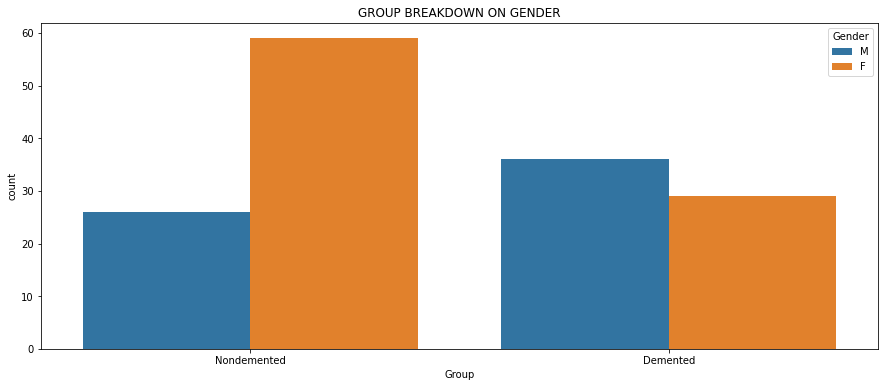

In [10]:
#see count of people in each category and consider only visit one, seperated on gender
plt.figure(figsize=(15,6))
sns.countplot(x='Group', data=df.loc[df['Visit'] == 1],hue='Gender')
plt.title("GROUP BREAKDOWN ON GENDER")

The demented subjects have comparable count of males and females. Non demented subjects have aprox 2/3 females.

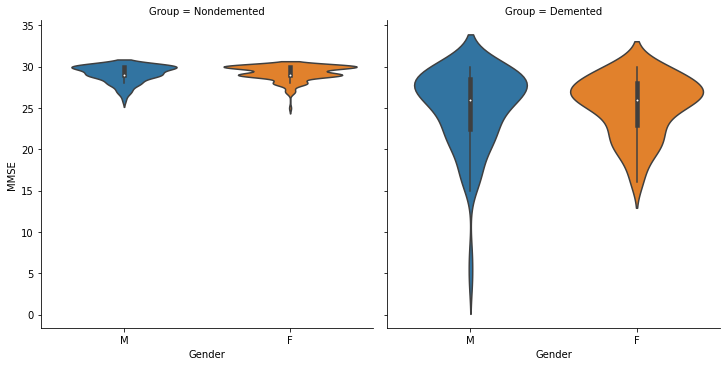

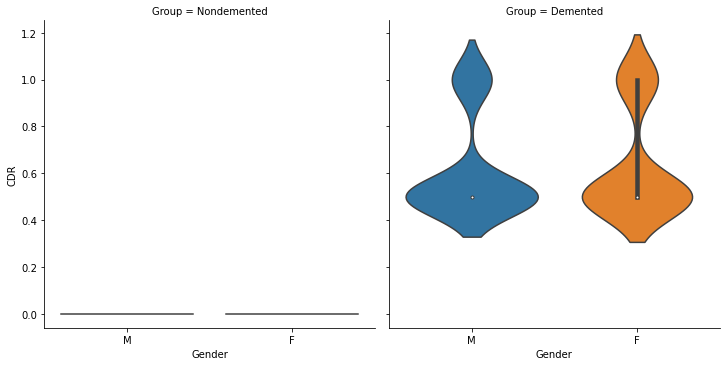

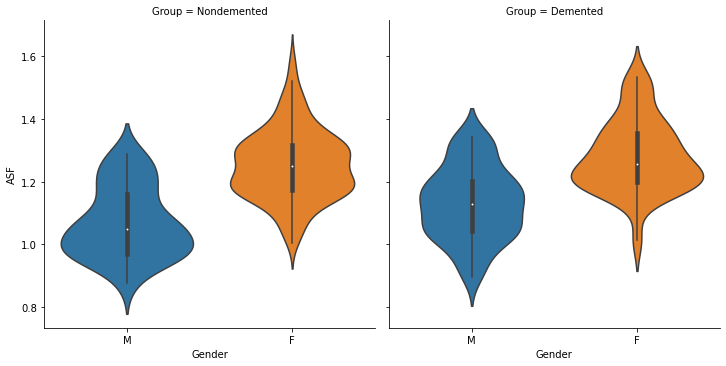

In [11]:
# factors breakup on gender and dementia group
sns.catplot(x='Gender',y='MMSE',data=df,kind='violin',col='Group')
sns.catplot(x='Gender',y='CDR',data=df,kind='violin',col='Group')
sns.catplot(x='Gender',y='ASF',data=df,kind='violin',col='Group')
plt.show()

1. MMSE (test value scores) has no significant influence from gender (high values, concentrated distribution).
   But it seems that for demented subjects, MMSE is highly distributed, with some males scoring even very low.
2. CDR (Dementia Score) has no significance affect from gender but has huge variation amongst demented subjects.
3. ASF (Brain volume) shows no significant influence from either gender or cognitive ability.

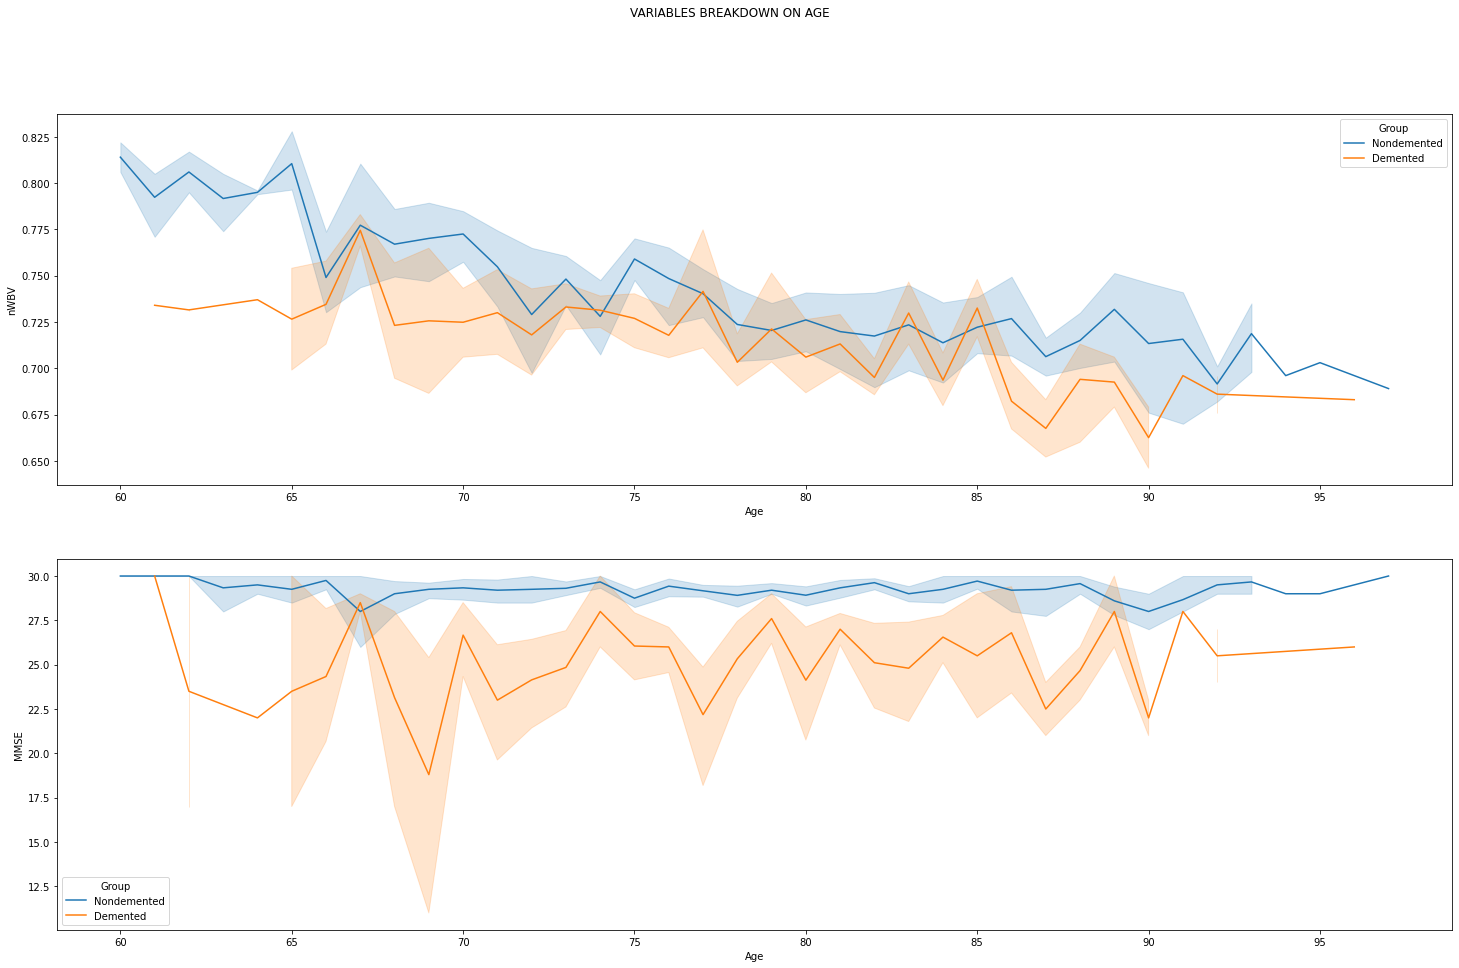

In [12]:
# factor breakup on age and dementia group
fig, axes = plt.subplots(2, 1, figsize=(25, 15))
plt.suptitle('VARIABLES BREAKDOWN ON AGE ')
sns.lineplot(data=df, x="Age", y="nWBV",ax=axes[0],hue='Group')
sns.lineplot(data=df, x="Age", y="MMSE",ax=axes[1],hue='Group')
plt.show()

1. nWBV(normalized brain volume) for both groups decreses stedily as age increases. Also, demented people show 
   a lower value as compared to non demented people.This implies maybe this feature can be accounted for as a
    dementia detecting symptom.
2. Examination scores (MMSE) do not fluctuate as age advances for normal subjects.

In [13]:
#map the categorical data into binary
maps_group = {"Demented": 1, "Nondemented": 0}
maps_gender = {"M": 1, "F": 0}
df['Group'] = df['Group'].map(maps_group)
df['Gender'] = df['Gender'].map(maps_gender)

## Feature Selection

<AxesSubplot:>

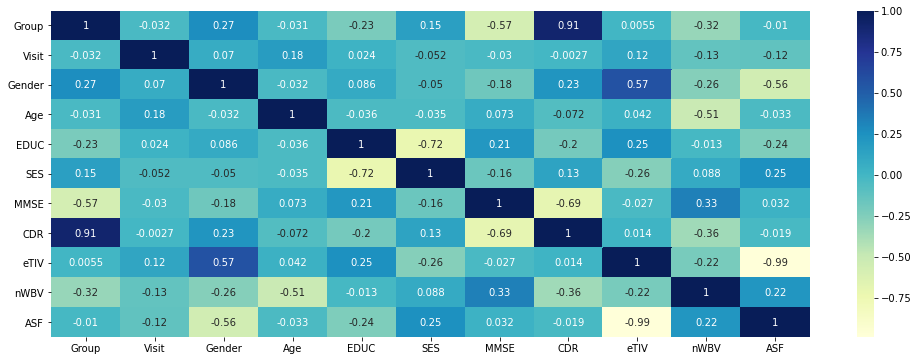

In [14]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

1. Group assignment is highly affected by the CDR and MMSE which is intutive as higher the CDR rating more the 
chances of a subject being demented, lower the MMSE score higher the chances of dementia.
2. Similary CDR and MMSE are also negatively correlated.
3. nWBV is being negatively influenced by age, brain volume decreses with age.
4. ASF is a function of etiv itself.
5. Gender and EDUC show a weak effect but will be considered considering the healthcare scenario.

Here the key is predicting the Group with the slected features and not CDR. CDR is also a kind of multiclass numeric 
assignment between 0,0.5 and 1 as per the dataset where 0 is NonDemented and 0.5 and 1 is Demented. Fitting group 
using CDR will sure shot give a perfect model but it wont be the correct approach here, to predict one class with 
another corelated class. Instead, we should explore how Group assignment is affected by the other stated factors such
as MMSE, nWBV, ASF, Gender and EDUC

In [15]:
import statsmodels.api as sm
formula = 'Group ~ MMSE + nWBV + ASF + Gender + EDUC'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

             sum_sq     df           F        PR(>F)
MMSE      15.972931    1.0  105.847356  5.821790e-22
nWBV       1.477768    1.0    9.792682  1.893478e-03
ASF        1.178144    1.0    7.807171  5.479301e-03
Gender     3.469058    1.0   22.988305  2.379744e-06
EDUC       1.187754    1.0    7.870852  5.293632e-03
Residual  54.929543  364.0         NaN           NaN


Clearly, all p values are small slected features are significant.

## Machine Learning Models 

Seperating target and control variables

In [16]:
x=df[['MMSE',"nWBV",'ASF','Gender','EDUC']]
y=df['Group']
y.dtype
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

### 1. Models for dementia classification (Binary Classification)

In [17]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve, plot_roc_curve,accuracy_score
def run_report_model_group(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    preds=model.predict(xtest)
    print(classification_report(ytest, preds))
    print(plot_confusion_matrix(model,xtest,ytest))

#### Logistic Regression 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        40
           1       0.83      0.71      0.76        34

    accuracy                           0.80        74
   macro avg       0.80      0.79      0.79        74
weighted avg       0.80      0.80      0.80        74


Accuracy from CV=5
0.818918918918919


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


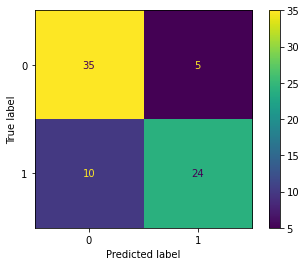

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
model=LogisticRegression()
run_report_model_group(model,xtrain,ytrain,xtest,ytest)

mse=cross_val_score(model,x,y,scoring='accuracy',cv=5) #want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nAccuracy from CV=5")
print(mean_mse)

In [19]:
ftr=pd.DataFrame(index=x.columns,data=model.coef_[0],columns=['Importance'])
ftr=ftr[ftr['Importance']>0]
ftr

,Importance
ASF,0.664704
Gender,1.217702


#### Random Forest Classifier

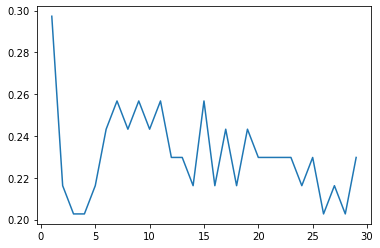

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# checking the best number of estimators  
test_err=[]
for n in range(1,30):
    rc=RandomForestClassifier(n_estimators=n,max_features='auto', random_state=101)
    rc.fit(xtrain,ytrain)
    test_pred=rc.predict(xtest)
    test_err.append(1-accuracy_score(test_pred,ytest))
    
plt.plot(range(1,30),test_err,label='test error')
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        40
           1       0.82      0.68      0.74        34

    accuracy                           0.78        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74


Accuracy from CV=5
0.7486486486486486


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


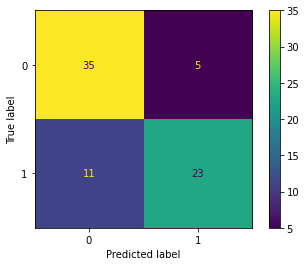

In [25]:
model=RandomForestClassifier(n_estimators=4)
run_report_model_group(model,xtrain,ytrain,xtest,ytest)

mse=cross_val_score(model,x,y,scoring='accuracy',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nAccuracy from CV=5")
print(mean_mse)

In [26]:
ftr=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['Importance'])
ftr=ftr[ftr['Importance']>0]
ftr

,Importance
MMSE,0.517067
nWBV,0.161350
ASF,0.192266
Gender,0.036708
EDUC,0.092609


#### Adaboost Classifier

/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warni

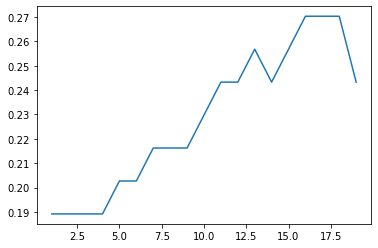

In [27]:
from sklearn.ensemble import AdaBoostClassifier
er_rates=[]
for n in range(1,20): # 95 fetures so 
    model=AdaBoostClassifier(n_estimators=n) # maximum estimators/stumps you will generate, default=50
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    er=1-accuracy_score(ytest,pred)
    er_rates.append(er)
    
plt.plot(range(1,20),er_rates)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.88      0.68      0.77        34

    accuracy                           0.81        74
   macro avg       0.83      0.80      0.80        74
weighted avg       0.82      0.81      0.81        74


Accuracy from CV=5
0.8216216216216216


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


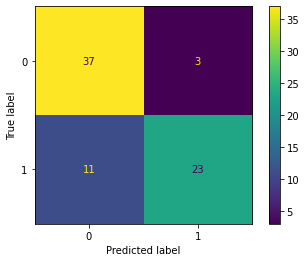

In [28]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=2, learning_rate=0.2)
run_report_model_group(model,xtrain,ytrain,xtest,ytest)

mse=cross_val_score(model,x,y,scoring='accuracy',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nAccuracy from CV=5")
print(mean_mse)

In [29]:
ftr=pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['Importance'])
ftr=ftr[ftr['Importance']>0]
ftr

,Importance
MMSE,1.0


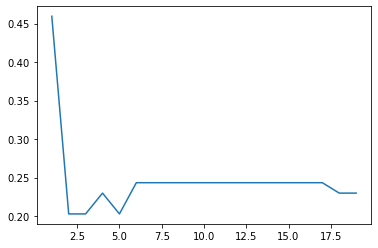

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
er_rates=[]
for n in range(1,20): # 95 fetures so 
    model=GradientBoostingClassifier(n_estimators=n) # maximum estimators/stumps you will generate, default=50
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    er=1-accuracy_score(ytest,pred)
    er_rates.append(er)
    
plt.plot(range(1,20),er_rates)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.88      0.68      0.77        34

    accuracy                           0.81        74
   macro avg       0.83      0.80      0.80        74
weighted avg       0.82      0.81      0.81        74


Accuracy from CV=5
0.8162162162162163


/Users/radhikagarg/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


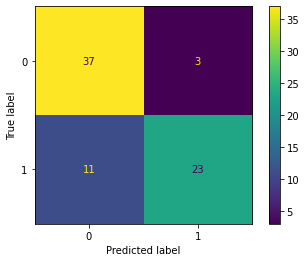

In [31]:
model=GradientBoostingClassifier(n_estimators=2, learning_rate=0.2, max_depth=2)
run_report_model_group(model,xtrain,ytrain,xtest,ytest)

mse=cross_val_score(model,x,y,scoring='accuracy',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nAccuracy from CV=5")
print(mean_mse)

# Conclusion

### Clearly, the different models are working in a similar fashion and we were able to acheive cross validation accuracy of around 80 to 81 %. Since healthcare is a critical industry, acheiving highly accurate predictions in case of diagnosos and prognosis is very important. It is clear with the analysis above that  more advanced computational models such as Neural Networks  and other Deep learning model variants need to be explored to surpass  the present results.